In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint



# La Lecture du Dataset 

In [2]:
data=pd.read_csv("Data/heart_statlog_cleveland_hungary_final.csv")

In [3]:

data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
data.shape

(1190, 12)

# Preprocessing du Dataset

In [5]:
data.isnull().sum()


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

##### Notre DataSet ne contiennent pas les valeurs manquantes

In [6]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


##### traitement des valeurs aberrantes en fonctions des informations dans la documentation

In [7]:
data.loc[data["cholesterol"] <40 , "cholesterol"] = np.nan


In [8]:
# Remplir les valeurs manquantes dans la colonne "cholesterol" avec la moyenne
data["cholesterol"] = data["cholesterol"].fillna(data["cholesterol"].mean())

In [9]:
data.loc[data['oldpeak'] < 0, 'oldpeak'] = data.loc[data['oldpeak'] < 0, 'oldpeak'].abs()

In [10]:
data=data[data["resting bp s"]>=80]

In [11]:
data = data[data['ST slope'] != 0]

In [12]:
data.shape

(1188, 12)

##### traitement des colonnes en fonctions des informations dans la documentation

In [13]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol            float64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [14]:
# Remplacer les valeurs dans la colonne 'sex'
data.loc[data['sex'] == 0, 'sex'] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'

# Remplacer les valeurs dans la colonne 'chest pain type'
data.loc[data['chest pain type'] == 1, 'chest pain type'] = 'typical angina'
data.loc[data['chest pain type'] == 2, 'chest pain type'] = 'atypical angina'
data.loc[data['chest pain type'] == 3, 'chest pain type'] = 'non-anginal pain'
data.loc[data['chest pain type'] == 4, 'chest pain type'] = 'asymptomatic'

# Remplacer les valeurs dans la colonne 'fasting blood sugar'
data.loc[data['fasting blood sugar'] == 0, 'fasting blood sugar'] = 'fasting blood sugar < 120 mg/dl'
data.loc[data['fasting blood sugar'] == 1, 'fasting blood sugar'] = 'fasting blood sugar > 120 mg/dl'

# Remplacer les valeurs dans la colonne 'resting ecg'
data.loc[data['resting ecg'] == 0, 'resting ecg'] = 'normal'
data.loc[data['resting ecg'] == 1, 'resting ecg'] = 'ST-T wave abnormality'
data.loc[data['resting ecg'] == 2, 'resting ecg'] = 'left ventricular hypertrophy'

# Remplacer les valeurs dans la colonne 'exercise angina'
data.loc[data['exercise angina'] == 0, 'exercise angina'] = 'no'
data.loc[data['exercise angina'] == 1, 'exercise angina'] = 'yes'

# Remplacer les valeurs dans la colonne 'ST slope'
data.loc[data['ST slope'] == 1, 'ST slope'] = 'upsloping'
data.loc[data['ST slope'] == 2, 'ST slope'] = 'flat'
data.loc[data['ST slope'] == 3, 'ST slope'] = 'downsloping'

# Remplacer les valeurs dans la colonne 'target'
data.loc[data['target'] == 0, 'target'] = 'normal'
data.loc[data['target'] == 1, 'target'] = 'heart disease'


C:\Users\Othmane\AppData\Local\Temp\ipykernel_1188\377435602.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['sex'] == 0, 'sex'] = 'female'
C:\Users\Othmane\AppData\Local\Temp\ipykernel_1188\377435602.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'typical angina' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['chest pain type'] == 1, 'chest pain type'] = 'typical angina'
C:\Users\Othmane\AppData\Local\Temp\ipykernel_1188\377435602.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'fasting blood sugar < 120 mg/dl' has dtype incompatible with int64, please explicitly c

In [15]:
data.dtypes

age                      int64
sex                     object
chest pain type         object
resting bp s             int64
cholesterol            float64
fasting blood sugar     object
resting ecg             object
max heart rate           int64
exercise angina         object
oldpeak                float64
ST slope                object
target                  object
dtype: object

##### Division en Valeur numeric et catégorique

In [16]:
numerical_variables=data.select_dtypes(include=['int','float'])

In [17]:
numerical_variables

,age,resting bp s,cholesterol,max heart rate,oldpeak
0,40,140,289.0,172,0.0
1,49,160,180.0,156,1.0
2,37,130,283.0,98,0.0
3,48,138,214.0,108,1.5
4,54,150,195.0,122,0.0
...,...,...,...,...,...
1185,45,110,264.0,132,1.2
1186,68,144,193.0,141,3.4
1187,57,130,131.0,115,1.2
1188,57,130,236.0,174,0.0


In [18]:
categorical_variables=data.select_dtypes(exclude=['int','float'])

In [19]:
categorical_variables

,sex,chest pain type,fasting blood sugar,resting ecg,exercise angina,ST slope,target
0,male,atypical angina,fasting blood sugar < 120 mg/dl,normal,no,upsloping,normal
1,female,non-anginal pain,fasting blood sugar < 120 mg/dl,normal,no,flat,heart disease
2,male,atypical angina,fasting blood sugar < 120 mg/dl,ST-T wave abnormality,no,upsloping,normal
3,female,asymptomatic,fasting blood sugar < 120 mg/dl,normal,yes,flat,heart disease
4,male,non-anginal pain,fasting blood sugar < 120 mg/dl,normal,no,upsloping,normal
...,...,...,...,...,...,...,...
1185,male,typical angina,fasting blood sugar < 120 mg/dl,normal,no,flat,heart disease
1186,male,asymptomatic,fasting blood sugar > 120 mg/dl,normal,no,flat,heart disease
1187,male,asymptomatic,fasting blood sugar < 120 mg/dl,normal,yes,flat,heart disease
1188,female,atypical angina,fasting blood sugar < 120 mg/dl,left ventricular hypertrophy,no,flat,heart disease


#### Statistiques

In [20]:
numerical_variables.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1188.0,53.707071,9.356825,28.0,47.0,54.00000,60.0,77.0
resting bp s,1188.0,132.250000,17.971961,80.0,120.0,130.00000,140.0,200.0
cholesterol,1188.0,245.949531,52.966414,85.0,214.0,245.90668,270.0,603.0
max heart rate,1188.0,139.726431,25.534292,60.0,121.0,140.50000,160.0,202.0
oldpeak,1188.0,0.944613,1.068101,0.0,0.0,0.65000,1.6,6.2


In [21]:
categorical_variables.describe().T

,count,unique,top,freq
sex,1188,2,male,907
chest pain type,1188,4,asymptomatic,625
fasting blood sugar,1188,2,fasting blood sugar < 120 mg/dl,935
resting ecg,1188,3,normal,682
exercise angina,1188,2,no,727
ST slope,1188,3,flat,581
target,1188,2,heart disease,627


##### Visualisation et Analyse 

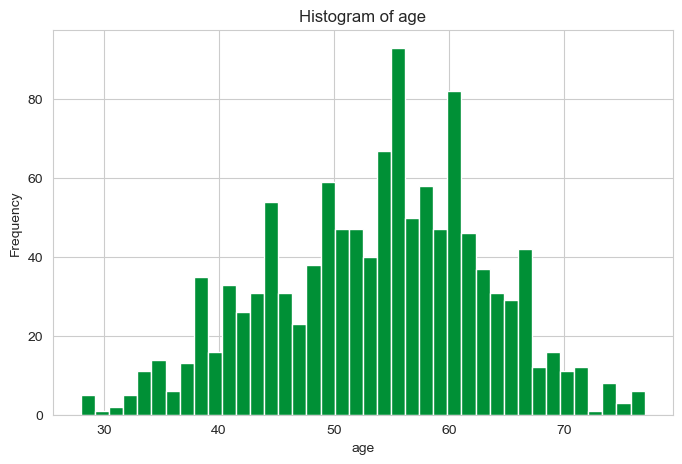

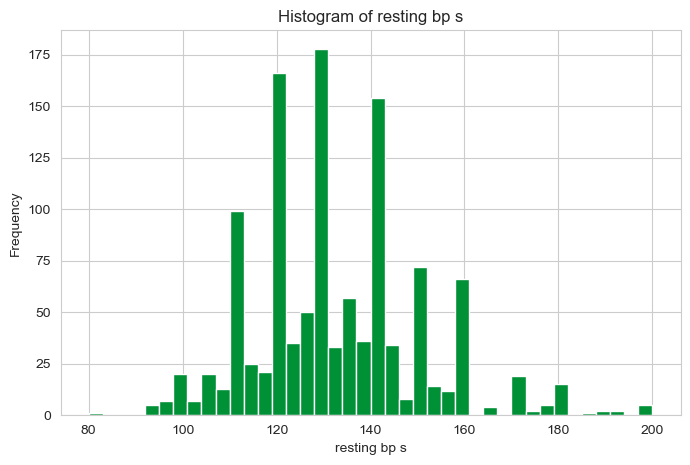

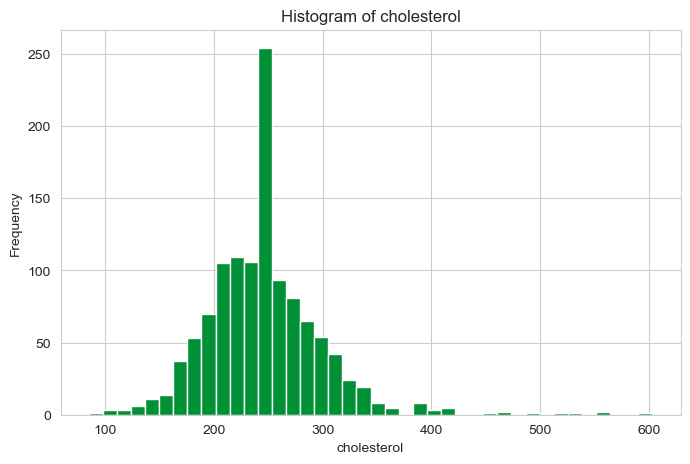

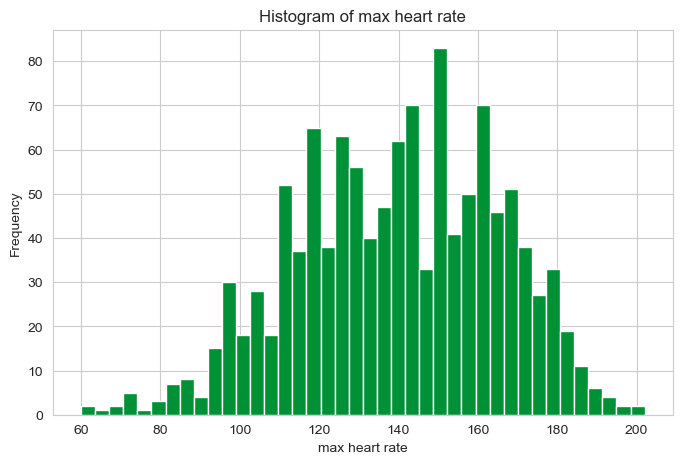

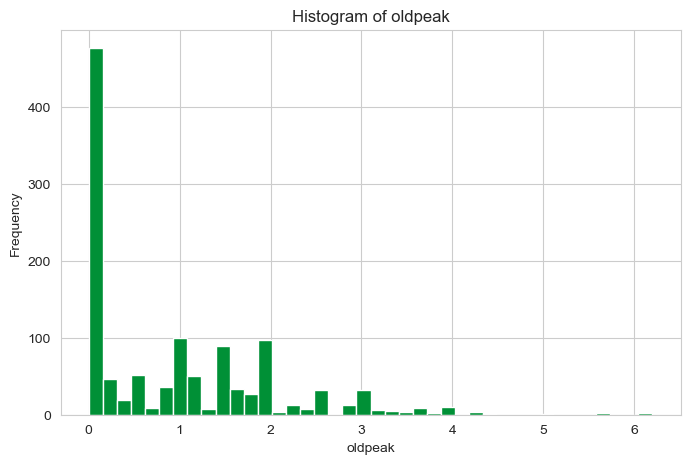

In [22]:
for column in numerical_variables:
    # Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=40, color='#009036', edgecolor='white')
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.show()

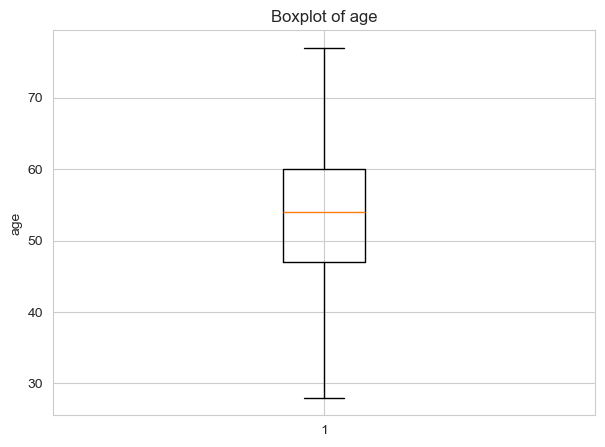

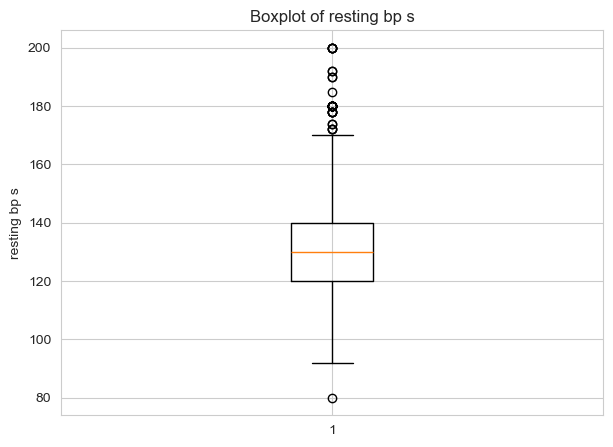

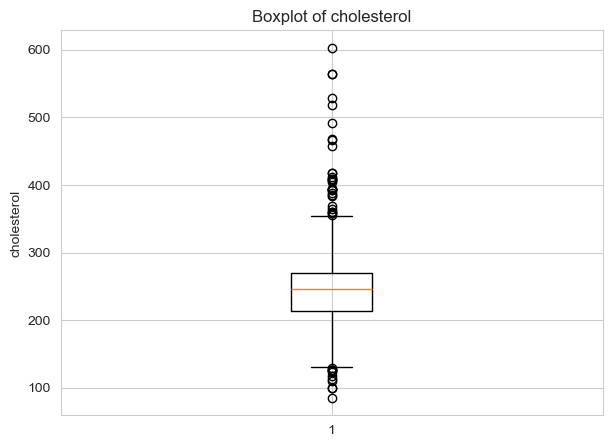

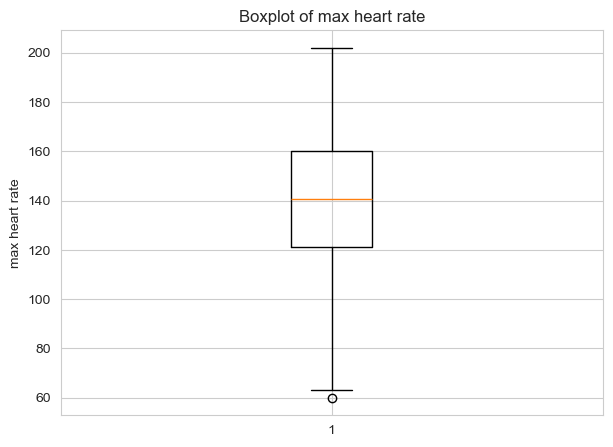

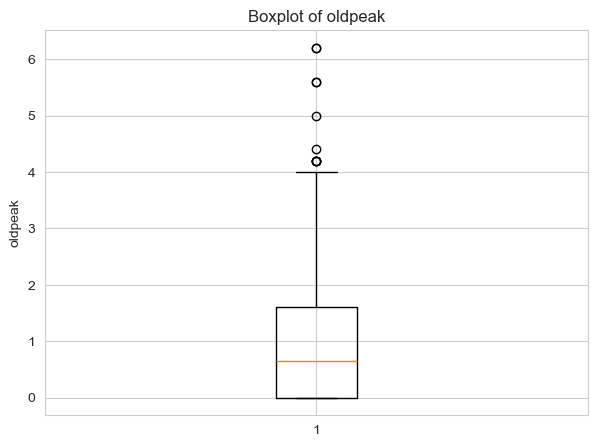

In [23]:
for column in numerical_variables:
    # Boxplot
    plt.figure(figsize=(7, 5))
    plt.boxplot(data[column])
    plt.title('Boxplot of '+ column)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()
    


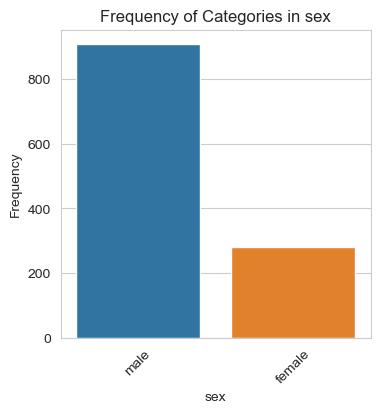

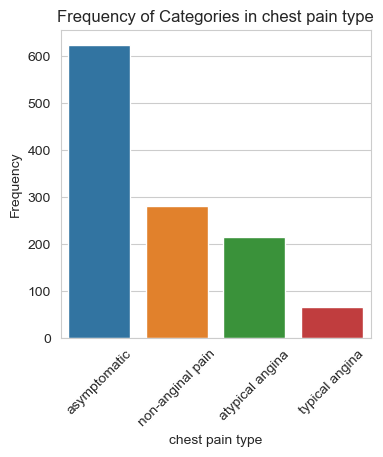

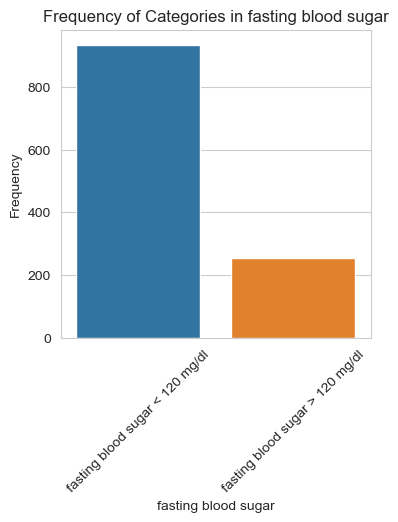

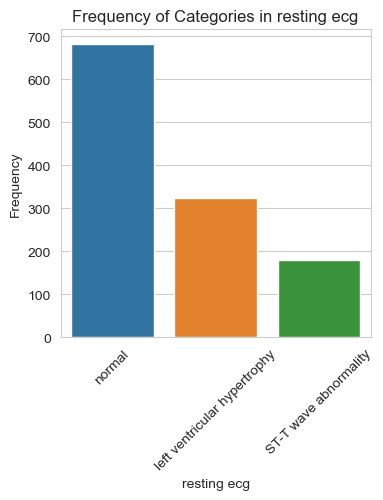

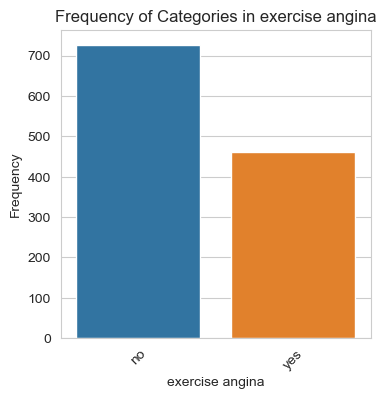

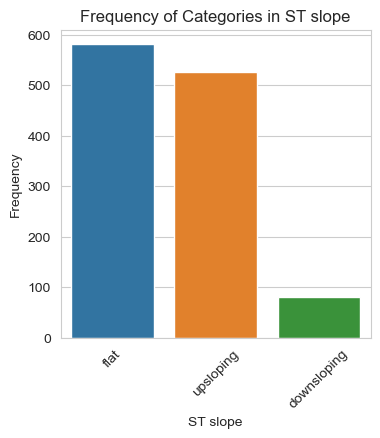

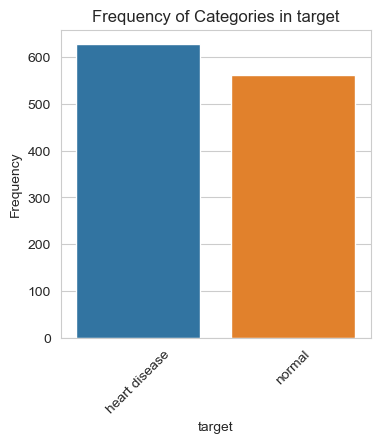

In [24]:
for col in categorical_variables:
    # Count the frequencies of each category
    category_counts = data[col].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(4, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title('Frequency of Categories in '+ col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

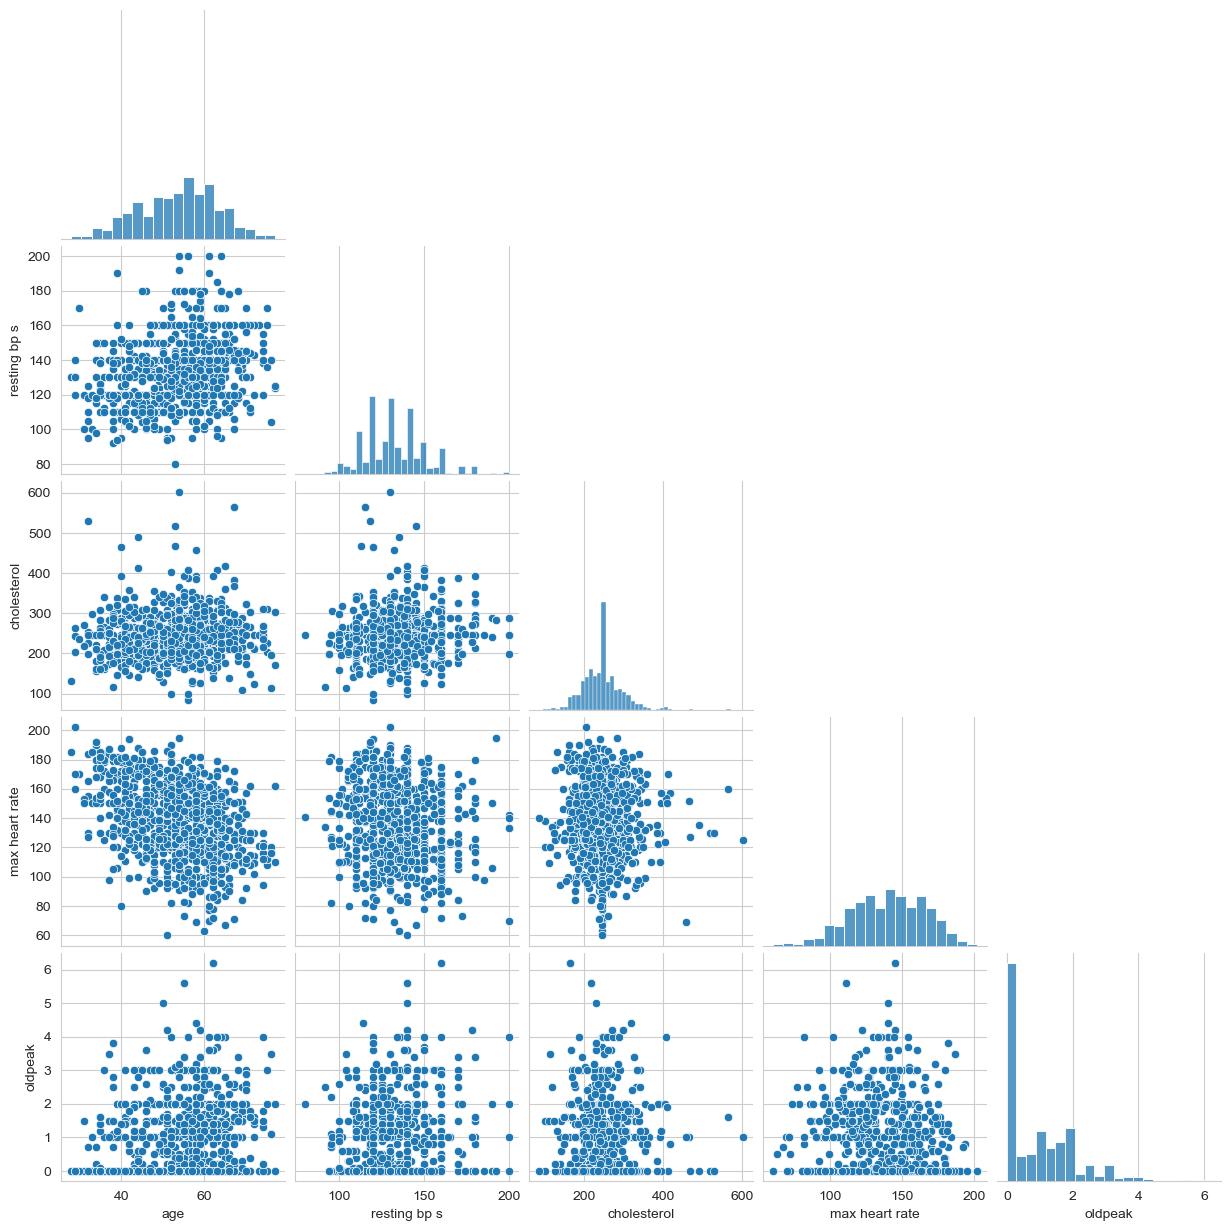

In [25]:
sns.pairplot(numerical_variables,corner=True)

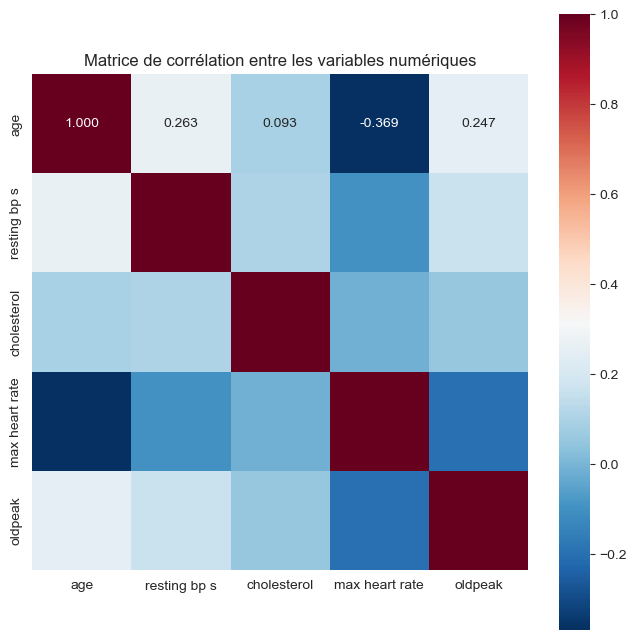

In [26]:
correlation_matrix=numerical_variables.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".3f", square=True)
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

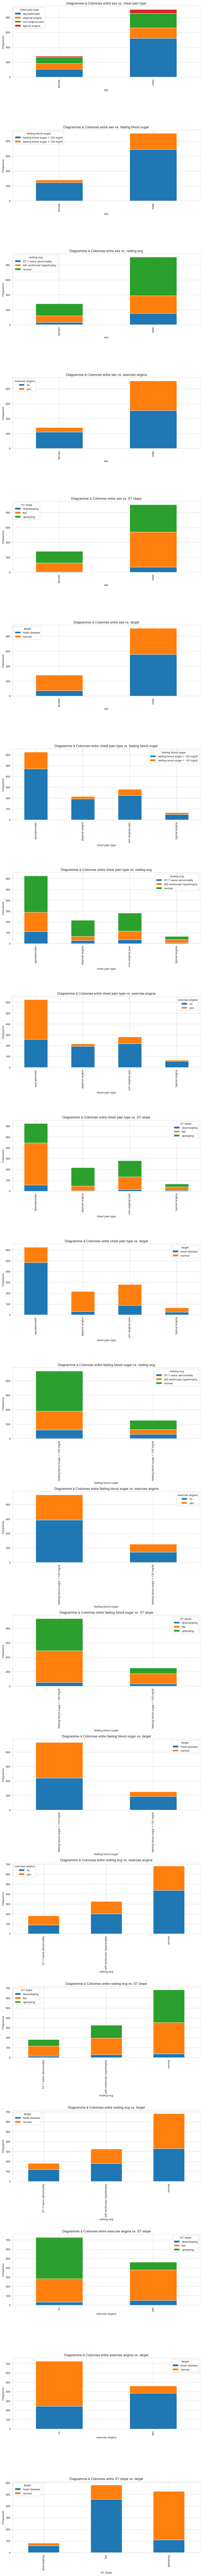

In [27]:
# Liste des paires de variables catégorielles à comparer
pairs = [(categorical_variables.columns[i], categorical_variables.columns[j]) 
         for i in range(len(categorical_variables.columns))
         for j in range(i + 1, len(categorical_variables.columns))]

# Créer un diagramme à colonnes empilées pour chaque paire de variables catégorielles
num_pairs = len(pairs)
fig, axes = plt.subplots(nrows=num_pairs, ncols=1, figsize=(10, 6*num_pairs))

# Si il y a un seul graphique, axes ne sera pas une liste mais un seul objet Axes
if num_pairs == 1:
    axes = [axes]

for i, (var1, var2) in enumerate(pairs):
    # Créer un tableau croisé des deux variables catégorielles
    ct = pd.crosstab(categorical_variables[var1], categorical_variables[var2])
    
    # Plotter le diagramme à colonnes empilées (stacked bar chart)
    ct.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Diagramme à Colonnes entre {var1} vs. {var2}')
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel('Fréquence')

# Afficher tous les graphiques à la fin
plt.tight_layout()
plt.show()


C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease

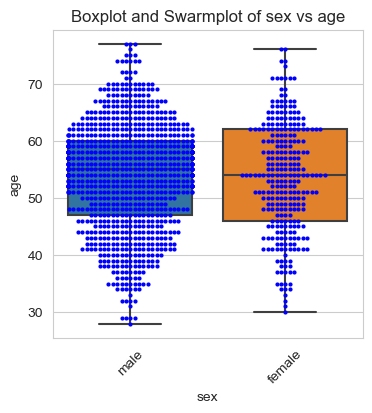

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.9% of the points cannot be placed; you may want to decrease

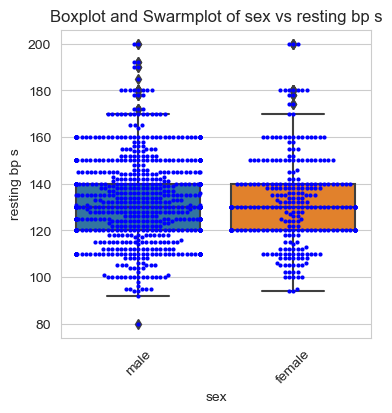

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease

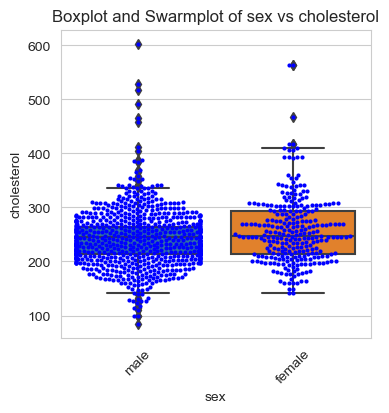

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease 

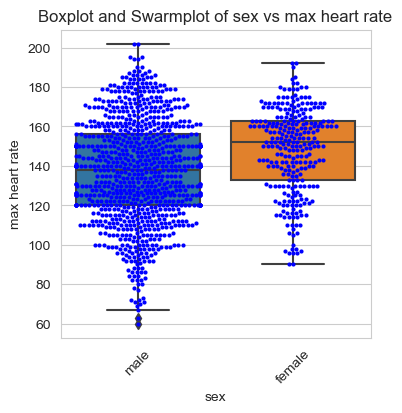

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.3% of the points cannot be placed; you may want to decrease

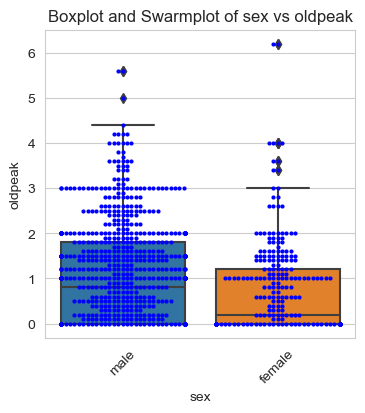

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.1% of the points cannot be placed; you may want to decrease

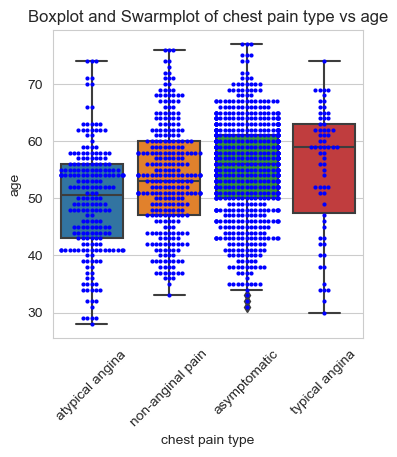

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.4% of the points cannot be placed; you may want to decrease

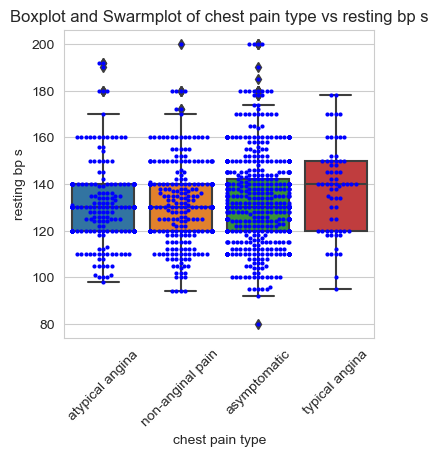

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease

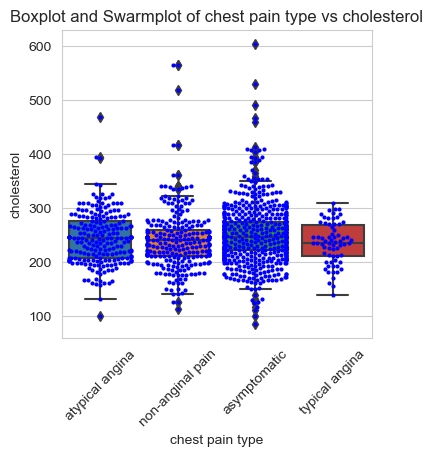

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.4% of the points cannot be placed; you may want to decrease

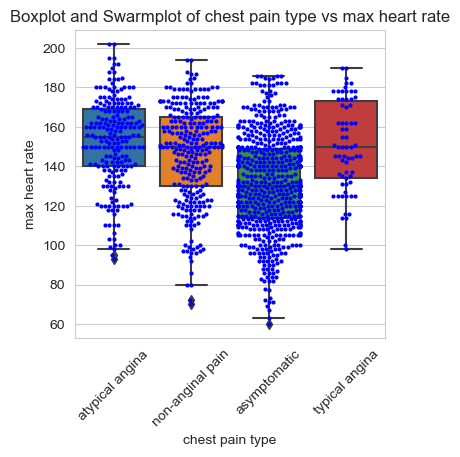

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease

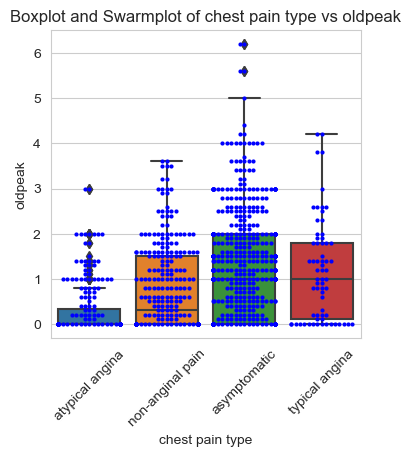

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease 

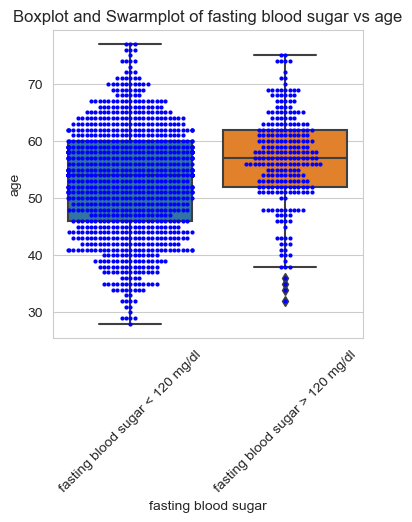

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.9% of the points cannot be placed; you may want to decrease

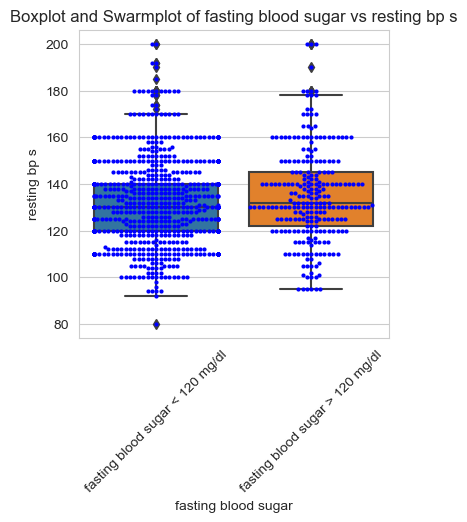

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.6% of the points cannot be placed; you may want to decrease

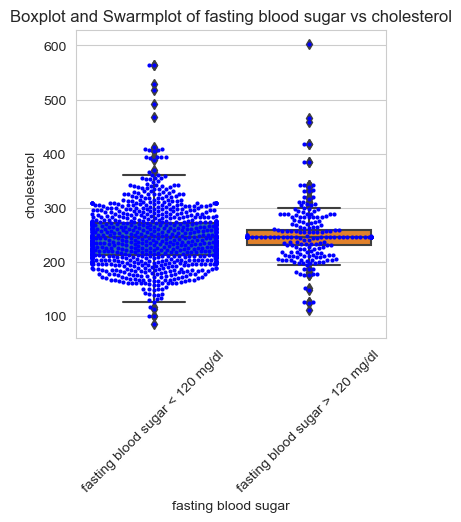

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease 

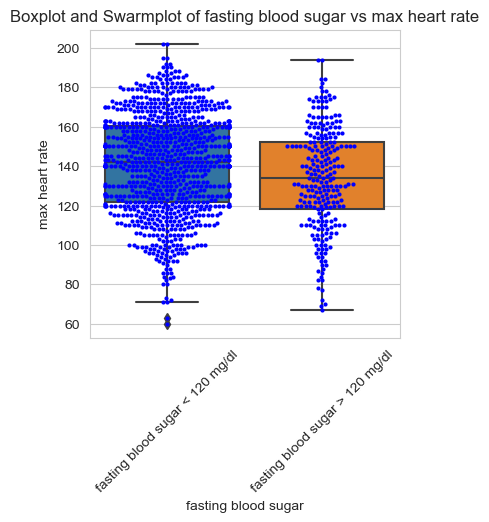

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.0% of the points cannot be placed; you may want to decrease

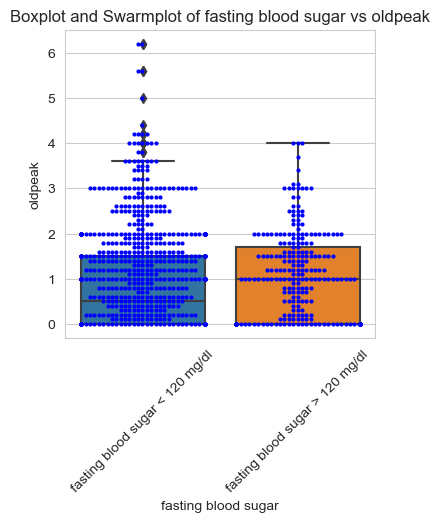

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.2% of the points cannot be placed; you may want to decrease

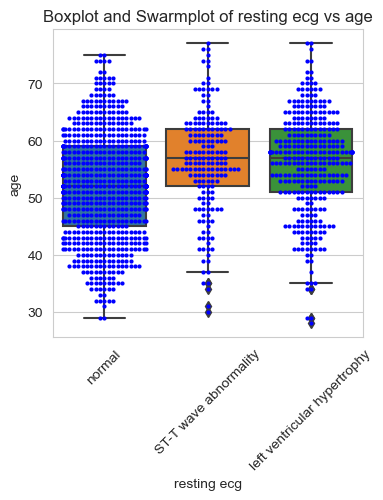

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease

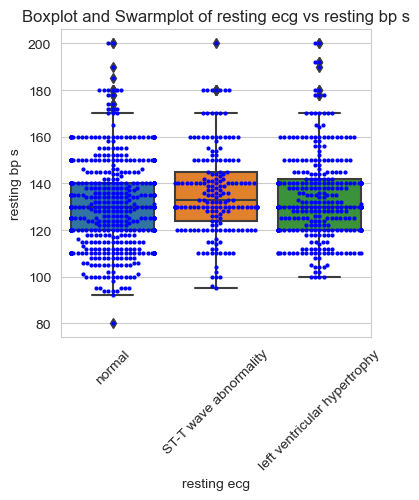

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.1% of the points cannot be placed; you may want to decrease

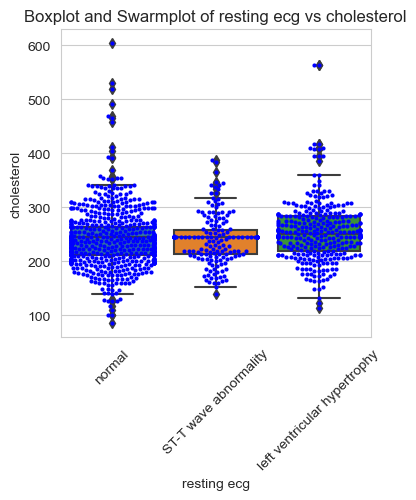

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease

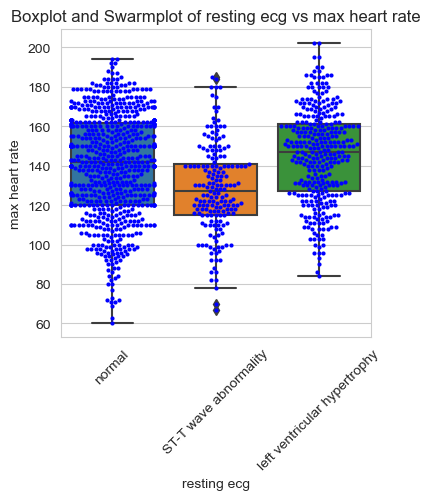

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.3% of the points cannot be placed; you may want to decrease

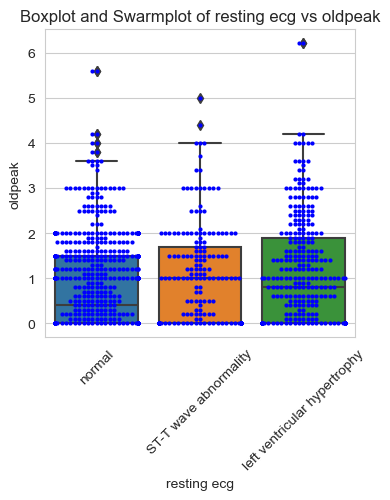

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


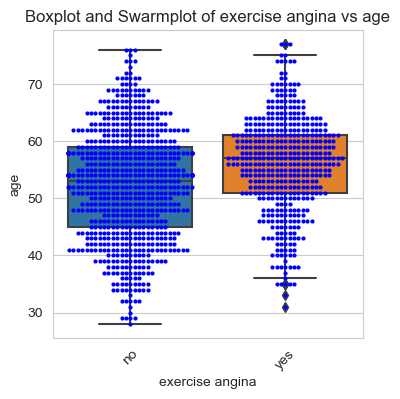

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.5% of the points cannot be placed; you may want to decrease

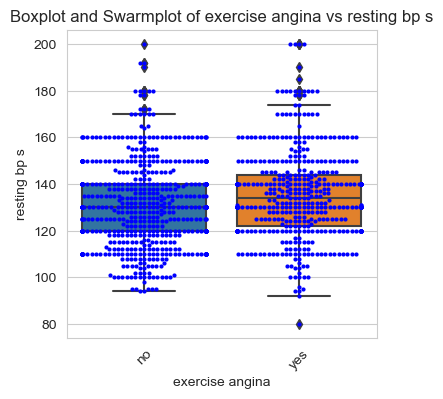

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.0% of the points cannot be placed; you may want to decrease

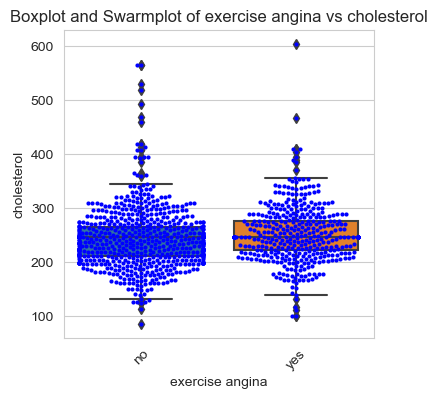

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; you may want to decrease 

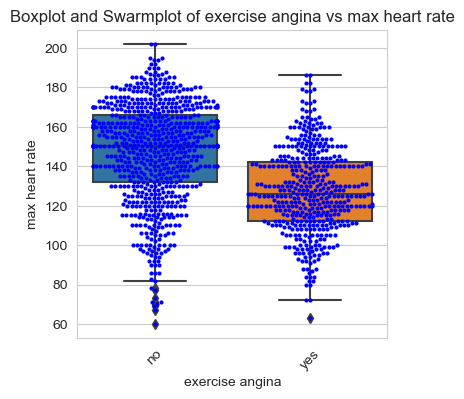

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.6% of the points cannot be placed; you may want to decrease

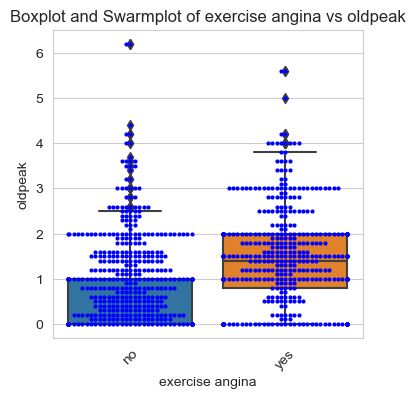

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease 

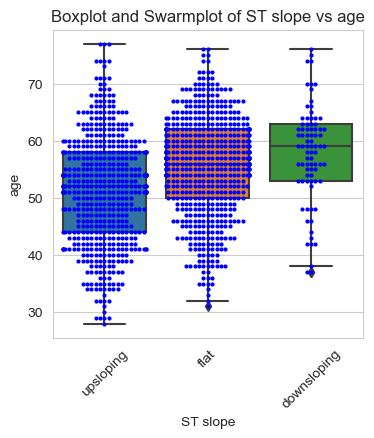

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.0% of the points cannot be placed; you may want to decrease

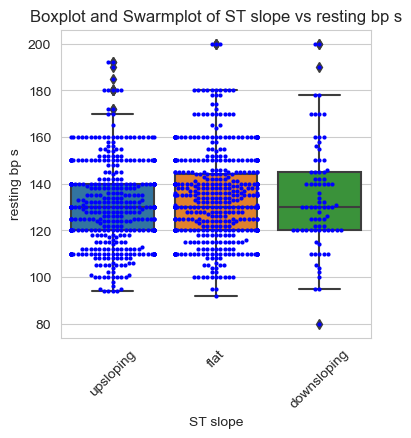

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease

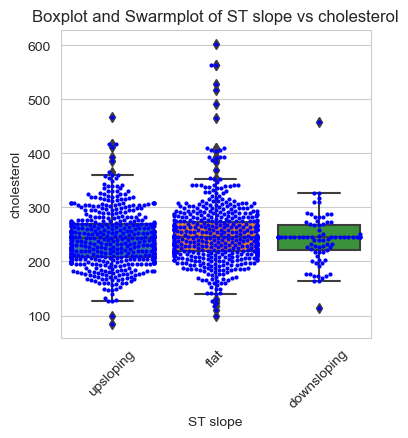

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease

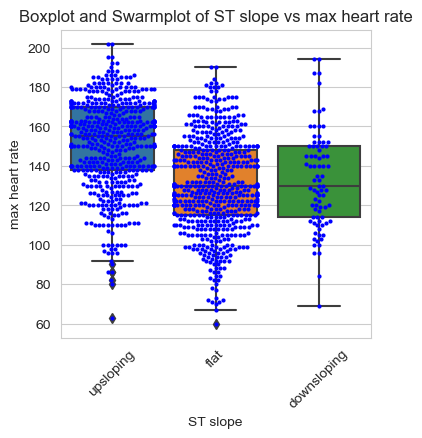

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.5% of the points cannot be placed; you may want to decrease

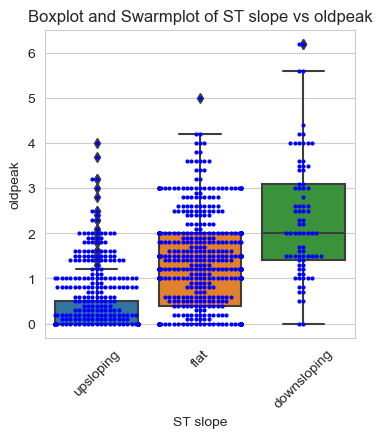

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


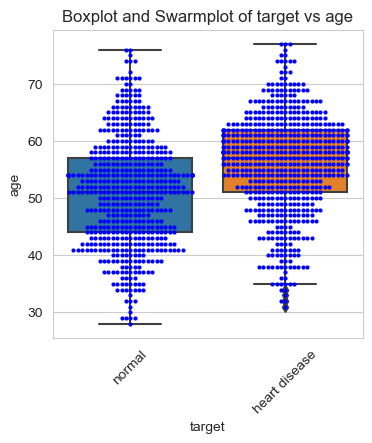

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.3% of the points cannot be placed; you may want to decrease

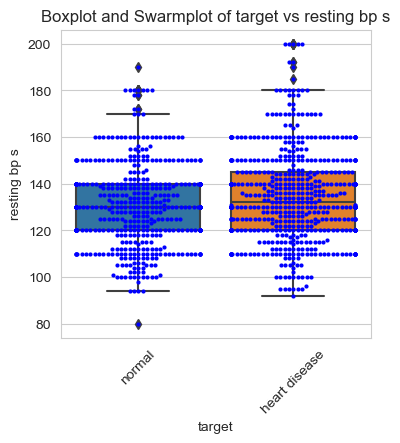

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease

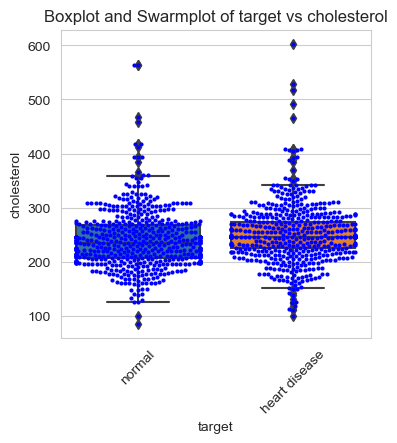

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


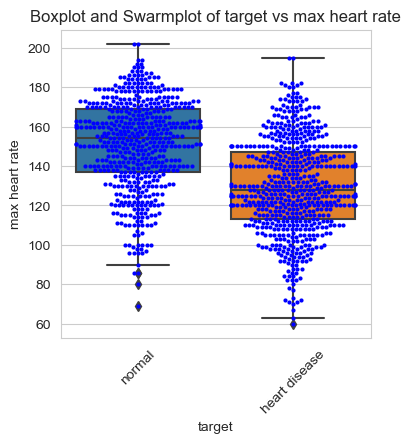

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.9% of the points cannot be placed; you may want to decrease

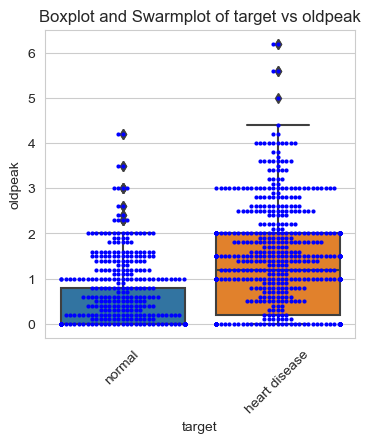

In [28]:
for i in categorical_variables:
    for j in numerical_variables:
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=i, y=j, data=data)
        sns.swarmplot(x=i, y=j, data=data, color='blue', size=3)
        plt.title('Boxplot and Swarmplot of '+i+' vs '+ j)
        plt.xlabel(i)
        plt.ylabel(j)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
        plt.show()

##### Features vs Label

In [29]:
X = data.iloc[: , :-1] #features 
y = data.iloc[: , -1] #label

In [30]:
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,male,atypical angina,140,289.0,fasting blood sugar < 120 mg/dl,normal,172,no,0.0,upsloping
1,49,female,non-anginal pain,160,180.0,fasting blood sugar < 120 mg/dl,normal,156,no,1.0,flat
2,37,male,atypical angina,130,283.0,fasting blood sugar < 120 mg/dl,ST-T wave abnormality,98,no,0.0,upsloping
3,48,female,asymptomatic,138,214.0,fasting blood sugar < 120 mg/dl,normal,108,yes,1.5,flat
4,54,male,non-anginal pain,150,195.0,fasting blood sugar < 120 mg/dl,normal,122,no,0.0,upsloping
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110,264.0,fasting blood sugar < 120 mg/dl,normal,132,no,1.2,flat
1186,68,male,asymptomatic,144,193.0,fasting blood sugar > 120 mg/dl,normal,141,no,3.4,flat
1187,57,male,asymptomatic,130,131.0,fasting blood sugar < 120 mg/dl,normal,115,yes,1.2,flat
1188,57,female,atypical angina,130,236.0,fasting blood sugar < 120 mg/dl,left ventricular hypertrophy,174,no,0.0,flat


In [31]:
y

0              normal
1       heart disease
2              normal
3       heart disease
4              normal
            ...      
1185    heart disease
1186    heart disease
1187    heart disease
1188    heart disease
1189           normal
Name: target, Length: 1188, dtype: object

##### Features Engineering

In [32]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(X, columns=['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope'])
print(df_encoded.dtypes)
df_encoded

age                                                      int64
resting bp s                                             int64
cholesterol                                            float64
max heart rate                                           int64
oldpeak                                                float64
sex_female                                                bool
sex_male                                                  bool
chest pain type_asymptomatic                              bool
chest pain type_atypical angina                           bool
chest pain type_non-anginal pain                          bool
chest pain type_typical angina                            bool
fasting blood sugar_fasting blood sugar < 120 mg/dl       bool
fasting blood sugar_fasting blood sugar > 120 mg/dl       bool
resting ecg_ST-T wave abnormality                         bool
resting ecg_left ventricular hypertrophy                  bool
resting ecg_normal                                     

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex_female,sex_male,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,...,fasting blood sugar_fasting blood sugar < 120 mg/dl,fasting blood sugar_fasting blood sugar > 120 mg/dl,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,exercise angina_no,exercise angina_yes,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,40,140,289.0,172,0.0,False,True,False,True,False,...,True,False,False,False,True,True,False,False,False,True
1,49,160,180.0,156,1.0,True,False,False,False,True,...,True,False,False,False,True,True,False,False,True,False
2,37,130,283.0,98,0.0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
3,48,138,214.0,108,1.5,True,False,True,False,False,...,True,False,False,False,True,False,True,False,True,False
4,54,150,195.0,122,0.0,False,True,False,False,True,...,True,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,110,264.0,132,1.2,False,True,False,False,False,...,True,False,False,False,True,True,False,False,True,False
1186,68,144,193.0,141,3.4,False,True,True,False,False,...,False,True,False,False,True,True,False,False,True,False
1187,57,130,131.0,115,1.2,False,True,True,False,False,...,True,False,False,False,True,False,True,False,True,False
1188,57,130,236.0,174,0.0,True,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False


In [33]:
X=df_encoded
X

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex_female,sex_male,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,...,fasting blood sugar_fasting blood sugar < 120 mg/dl,fasting blood sugar_fasting blood sugar > 120 mg/dl,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,exercise angina_no,exercise angina_yes,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,40,140,289.0,172,0.0,False,True,False,True,False,...,True,False,False,False,True,True,False,False,False,True
1,49,160,180.0,156,1.0,True,False,False,False,True,...,True,False,False,False,True,True,False,False,True,False
2,37,130,283.0,98,0.0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
3,48,138,214.0,108,1.5,True,False,True,False,False,...,True,False,False,False,True,False,True,False,True,False
4,54,150,195.0,122,0.0,False,True,False,False,True,...,True,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,110,264.0,132,1.2,False,True,False,False,False,...,True,False,False,False,True,True,False,False,True,False
1186,68,144,193.0,141,3.4,False,True,True,False,False,...,False,True,False,False,True,True,False,False,True,False
1187,57,130,131.0,115,1.2,False,True,True,False,False,...,True,False,False,False,True,False,True,False,True,False
1188,57,130,236.0,174,0.0,True,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False


##### Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (831, 21)
y_train : (831,)
X_test : (357, 21)
y_test : (357,)


### Machine Learning

##### Decision tree Classifier

###### Model Training

In [35]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train , y_train)


DecisionTreeClassifier()

###### Metrics d'évaluation

In [36]:
label='heart disease'

y_predDT = DTmodel.predict(X_test)
DTscore = DTmodel.score(X_test , y_test)
DTaccuracy = accuracy_score(y_test , y_predDT)
DTprecision = precision_score(y_test, y_predDT,pos_label=label)
DTrecall = recall_score(y_test, y_predDT,pos_label=label)
DTf1_score = f1_score(y_test, y_predDT,pos_label=label)
DTconfusion_mat = confusion_matrix(y_test , y_predDT)


In [37]:
print("Score:",DTscore)
print("Test accuracy:", DTaccuracy)
print("Precision:", DTprecision)
print("Recall:", DTrecall)
print("F1-score:", DTf1_score)
print("Confusion Matrix:")
DTconfusion_mat

Score: 0.8403361344537815
Test accuracy: 0.8403361344537815
Precision: 0.8512820512820513
Recall: 0.8556701030927835
F1-score: 0.8534704370179949
Confusion Matrix:


array([[166,  28],
       [ 29, 134]], dtype=int64)

###### Hyperparameter Tuning

In [38]:
# Define parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Perform grid search or random search for hyperparameter tuning
random_search_dt = RandomizedSearchCV(DTmodel, param_distributions=param_grid_dt, n_iter=10, cv=5)

# Fit the model
random_search_dt.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for DecisionTreeClassifier:", random_search_dt.best_params_)
print("Best score for DecisionTreeClassifier:", random_search_dt.best_score_)

C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Best parameters for DecisionTreeClassifier: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best score for DecisionTreeClassifier: 0.8616333597864513


In [39]:
# Define parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Perform grid search or random search for hyperparameter tuning
grid_search_dt = GridSearchCV(DTmodel, param_grid_dt, cv=5)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for DecisionTreeClassifier:", grid_search_dt.best_params_)
print("Best score for DecisionTreeClassifier:", grid_search_dt.best_score_)



C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Best parameters for DecisionTreeClassifier: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for DecisionTreeClassifier: 0.8579756150349903


C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


###### Cross Validation

In [40]:
# Définir le nombre de folds pour la validation croisée
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42) 

# Perform k-fold cross-validation
cv_scores = cross_val_score(DTmodel, X_train, y_train, cv=kf )

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.82035928 0.84939759 0.84939759 0.81325301 0.81927711]
Mean CV accuracy: 0.8303369165283889


# ________________________________________________________________

##### SVM Classifier

###### Model Training

In [41]:
SVmodel=SVC()
SVmodel.fit(X_train , y_train)

SVC()

###### Metrics d'évaluation

In [42]:
y_predSV=SVmodel.predict(X_test)
SVscore=SVmodel.score(X_test , y_test)
SVaccuracy=accuracy_score(y_test , y_predSV)
SVprecision=precision_score(y_test, y_predSV,pos_label=label)
SVrecall=recall_score(y_test, y_predSV,pos_label=label)
SVf1_score=f1_score(y_test, y_predSV,pos_label=label)
SVconfusion_mat=confusion_matrix(y_test , y_predSV)

In [43]:
print("Score:",SVscore)
print("Test accuracy:", SVaccuracy)
print("Precision:", SVprecision)
print("Recall:", SVrecall)
print("F1-score:", SVf1_score)
print("Confusion Matrix:")
SVconfusion_mat

Score: 0.6582633053221288
Test accuracy: 0.6582633053221288
Precision: 0.6855670103092784
Recall: 0.6855670103092784
F1-score: 0.6855670103092784
Confusion Matrix:


array([[133,  61],
       [ 61, 102]], dtype=int64)

###### Hyperparametre Tuning

In [ ]:
"""# Define parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}


# Perform random search for hyperparameter tuning
random_search_svc = RandomizedSearchCV(SVmodel, param_distributions=param_grid_svc, n_iter=10, cv=5)

# Fit the model
random_search_svc.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for SVC:", random_search_svc.best_params_)
print("Best score for SVC:", random_search_svc.best_score_)
"""

In [45]:
# Define parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}


# Perform random search for hyperparameter tuning
grid_search_svc = GridSearchCV(SVmodel, param_grid_svc, cv=5)

# Fit the model
grid_search_svc.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for SVC:", grid_search_svc.best_params_)
print("Best score for SVC:", grid_search_svc.best_score_)

'# Define parameter grid for SVC\nparam_grid_svc = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'],\n    \'gamma\': [\'scale\', \'auto\'],\n}\n\n\n# Perform random search for hyperparameter tuning\ngrid_search_svc = GridSearchCV(SVmodel, param_grid_svc, cv=5)\n\n# Fit the model\ngrid_search_svc.fit(X_train, y_train)\n\n# Get the best parameters and score\nprint("Best parameters for SVC:", grid_search_svc.best_params_)\nprint("Best score for SVC:", grid_search_svc.best_score_)'

###### Cross Validation

In [46]:

# Définir le nombre de folds pour la validation croisée
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42) 

# Perform k-fold cross-validation
cv_scores = cross_val_score(SVmodel, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.71257485 0.69879518 0.75903614 0.71084337 0.6686747 ]
Mean CV accuracy: 0.7099848495779525


##### K nearest neighbour Classifier

###### Model Training

In [47]:
KNmodel=KNeighborsClassifier()
KNmodel.fit(X_train , y_train)

KNeighborsClassifier()

###### Metrics d'évaluation

In [48]:
y_predKN=KNmodel.predict(X_test)
KNscore=KNmodel.score(X_test , y_test)
KNaccuracy=accuracy_score(y_test , y_predKN)
KNprecision=precision_score(y_test, y_predKN,pos_label=label)
KNrecall=recall_score(y_test, y_predKN,pos_label=label)
KNf1_score=f1_score(y_test, y_predKN,pos_label=label)
KNconfusion_mat=confusion_matrix(y_test , y_predKN)

In [49]:
print("Score:",KNscore)
print("Test accuracy:", KNaccuracy)
print("Precision:", KNprecision)
print("Recall:", KNrecall)
print("F1-score:", KNf1_score)
print("Confusion Matrix:")
KNconfusion_mat

Score: 0.6750700280112045
Test accuracy: 0.6750700280112045
Precision: 0.703125
Recall: 0.6958762886597938
F1-score: 0.699481865284974
Confusion Matrix:


array([[135,  59],
       [ 57, 106]], dtype=int64)

###### Hyperparameter tuning

In [50]:

# Define parameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
}


# Perform random search for hyperparameter tuning
random_search_knn = RandomizedSearchCV(KNmodel, param_distributions=param_grid_knn, n_iter=10, cv=5)

# Fit the model
random_search_knn.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best score for KNN:", random_search_knn.best_score_)


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 10, 'leaf_size': 40, 'algorithm': 'auto'}
Best score for KNN: 0.7701031671596565


In [51]:

# Define parameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
}

# Perform random search for hyperparameter tuning
grid_search_knn = GridSearchCV(KNmodel, param_grid_knn, cv=5)

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)

Best parameters for KNN: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10, 'weights': 'distance'}
Best score for KNN: 0.7701031671596565


###### Cross Validation

In [52]:
# Définir le nombre de folds pour la validation croisée
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42) 

# Perform k-fold cross-validation
cv_scores = cross_val_score(KNmodel, X_train, y_train, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.73652695 0.72891566 0.71686747 0.63855422 0.69879518]
Mean CV accuracy: 0.7039318952456532


##### Random Forest Classifier

###### Model Training

In [53]:
RFmodel=RandomForestClassifier()
RFmodel.fit(X_train , y_train)

RandomForestClassifier()

###### Metrics d'évaluation

In [54]:
y_predRF=RFmodel.predict(X_test)
RFscore=RFmodel.score(X_test , y_test)
RFaccuracy=accuracy_score(y_test , y_predRF)
RFprecision=precision_score(y_test, y_predRF,pos_label=label)
RFrecall=recall_score(y_test, y_predRF,pos_label=label)
RFf1_score=f1_score(y_test, y_predRF,pos_label=label)
RFconfusion_mat=confusion_matrix(y_test , y_predRF)

In [55]:
print("Score:",RFscore)
print("Test accuracy:", RFaccuracy)
print("Precision:", RFprecision)
print("Recall:", RFrecall)
print("F1-score:", RFf1_score)
print("Confusion Matrix:")
RFconfusion_mat

Score: 0.907563025210084
Test accuracy: 0.907563025210084
Precision: 0.9045226130653267
Recall: 0.9278350515463918
F1-score: 0.916030534351145
Confusion Matrix:


array([[180,  14],
       [ 19, 144]], dtype=int64)

###### Hyperparameter Tuning

In [56]:
# Define parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}


# Perform grid search or random search for hyperparameter tuning
random_search_rf = RandomizedSearchCV(RFmodel, param_distributions=param_grid_rf, n_iter=10, cv=5)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for RandomForestClassifier:", random_search_rf.best_params_)
print("Best score for RandomForestClassifier:", random_search_rf.best_score_)


C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best score for RandomForestClassifier: 0.9181588629968978


In [57]:

# Define parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Perform grid search or random search for hyperparameter tuning
grid_search_rf = GridSearchCV(RFmodel, param_grid_rf, cv=5)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best score for RandomForestClassifier:", grid_search_rf.best_score_)

C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

Best parameters for RandomForestClassifier: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9193781112473847


###### Cross Validation

In [58]:
# Définir le nombre de folds pour la validation croisée
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42) 

# Perform k-fold cross-validation
cv_scores = cross_val_score(RFmodel, X_train, y_train, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.89820359 0.93975904 0.87951807 0.90963855 0.90963855]
Mean CV accuracy: 0.9073515619363681


##### Multi layer perceptron classifier

###### Model Training

In [59]:
MLPmodel=MLPClassifier()
MLPmodel.fit(X_train , y_train)

MLPClassifier()

###### Metrics d'évaluation

In [60]:
y_predMLP=MLPmodel.predict(X_test)
MLPscore=MLPmodel.score(X_test , y_test)
MLPaccuracy=accuracy_score(y_test , y_predMLP)
MLPprecision=precision_score(y_test, y_predMLP,pos_label=label)
MLPrecall=recall_score(y_test, y_predMLP,pos_label=label)
MLPf1_score=f1_score(y_test, y_predMLP,pos_label=label)
MLPconfusion_mat=confusion_matrix(y_test , y_predMLP)

In [61]:
print("Score:",MLPscore)
print("Test accuracy:", MLPaccuracy)
print("Precision:", MLPprecision)
print("Recall:", MLPrecall)
print("F1-score:", MLPf1_score)
print("Confusion Matrix")
MLPconfusion_mat

Score: 0.8011204481792717
Test accuracy: 0.8011204481792717
Precision: 0.7430830039525692
Recall: 0.9690721649484536
F1-score: 0.8411633109619687
Confusion Matrix


array([[188,   6],
       [ 65,  98]], dtype=int64)

###### Hyperparameter Tuning

In [62]:

# Define parameter grid for MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}



# Perform grid search or random search for hyperparameter tuning
random_search_mlp = RandomizedSearchCV(MLPmodel, param_distributions=param_grid_mlp, n_iter=10, cv=5)

# Fit the model
random_search_mlp.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for MLPClassifier:", random_search_mlp.best_params_)
print("Best score for MLPClassifier:", random_search_mlp.best_score_)


C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_netw

Best parameters for MLPClassifier: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Best score for MLPClassifier: 0.8387129355746339


In [63]:
# Define parameter grid for MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}


# Perform grid search or random search for hyperparameter tuning
grid_search_mlp = GridSearchCV(MLPmodel, param_grid_mlp, cv=5)

# Fit the model
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for MLPClassifier:", grid_search_mlp.best_params_)
print("Best score for MLPClassifier:", grid_search_mlp.best_score_)


C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\neural_netw

Best parameters for MLPClassifier: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score for MLPClassifier: 0.8507827718057861


###### Cross Validation

In [64]:
# Définir le nombre de folds pour la validation croisée
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42) 

# Perform k-fold cross-validation
cv_scores = cross_val_score(MLPmodel, X_train, y_train, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.8502994  0.85542169 0.80722892 0.81927711 0.8373494 ]
Mean CV accuracy: 0.833915301926268


##### Ensemble Learning

In [65]:
base_models = {
    'DecisionTree': DTmodel,
    'MLP': MLPmodel,
    'SVM': SVmodel,  
    'RandomForest': RFmodel,
    'KNN': KNmodel
}

###### Bagging

In [66]:
bagging_models = {}
for name, model in base_models.items():
    bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)
    bagging_model.fit(X_train, y_train)
    bagging_models[name] = bagging_model

for name, model in bagging_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Bagging Accuracy: {accuracy:.2f}')


C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


DecisionTree Bagging Accuracy: 0.88
MLP Bagging Accuracy: 0.85
SVM Bagging Accuracy: 0.66
RandomForest Bagging Accuracy: 0.90
KNN Bagging Accuracy: 0.69


###### Boosting

In [67]:
boosting_models = {}

for name, model in base_models.items():
    if name == 'DecisionTree':
        boosting_model = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state=42)
    else:
        boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
    
    boosting_model.fit(X_train, y_train)
    boosting_models[name] = boosting_model
for name, model in boosting_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Boosting Accuracy: {accuracy:.2f}')


C:\Users\Othmane\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


DecisionTree Boosting Accuracy: 0.84
MLP Boosting Accuracy: 0.85
SVM Boosting Accuracy: 0.85
RandomForest Boosting Accuracy: 0.85
KNN Boosting Accuracy: 0.85


###### Stacking

In [68]:

# Initialiser les classificateurs pour la méthode de stacking
estimators = [
    ('DecisionTree', DTmodel),
    ('MLP', MLPmodel),
    ('SVM', SVmodel),  
    ('RandomForest', RFmodel),
    ('KNN' , KNmodel)
]


# Initialiser le modèle de stacking
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_stacking = stacking_model.predict(X_test)

# Calculer l'accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print("Accuracy Stacking:", accuracy_stacking)


Accuracy Stacking: 0.9131652661064426
